## Algoritmo KNN

El algoritmo KNN (K Nearest Neighbors) trata de buscar los K puntos más cercanos a un punto concreto para poder inferir su valor.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Tenemos la altura y el peso de cinco personas, junto con su respectivo género (Hombre o mujer).

In [2]:
data = {'Peso': [50, 80, 90, 50, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

df = pd.DataFrame(data)
df

,Peso,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,50,1.55,m
4,60,1.60,m


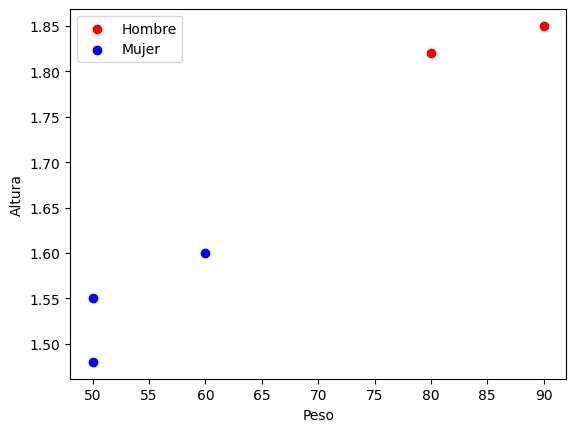

In [3]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Peso'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Peso'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

plt.xlabel("Peso")
plt.ylabel("Altura")
ax.legend();

Si nos dieran datos de una sexta persona, pero no nos dieran su género, ¿Podríamos adivinarlo de alguna forma?

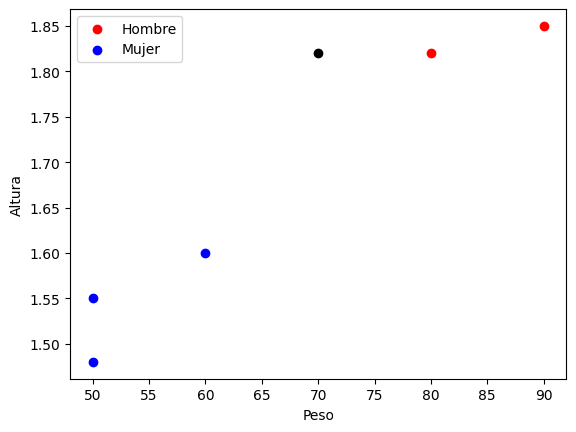

In [4]:
punto_nuevo = {'Peso': [70],
               'Altura': [1.82]}


punto_nuevo = pd.DataFrame(punto_nuevo)

ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Peso'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")

ax.scatter(df.loc[df['Genero'] == 'm', 'Peso'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

ax.scatter(punto_nuevo['Peso'],
           punto_nuevo['Altura'],
           c="black")
plt.xlabel("Peso")
plt.ylabel("Altura")
ax.legend();

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)

X = df[['Peso', 'Altura']]
y = df['Genero']

knn.fit(X, y)

prediction = knn.predict(punto_nuevo)
print(prediction)

['m']


In [6]:
for k in range(1,6):
    print(k)

1
2
3
4
5


In [7]:
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    print('K=',k)
    print(knn.predict(punto_nuevo))
    print('-'*50)

K= 1
['h']
--------------------------------------------------
K= 2
['h']
--------------------------------------------------
K= 3
['h']
--------------------------------------------------
K= 4
['h']
--------------------------------------------------
K= 5
['m']
--------------------------------------------------


In [8]:
knn.classes_

array(['h', 'm'], dtype=object)

Documentacion: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
